### Forked from Quantopian- Lecture 1 Notebook 

#Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

##Code Cells Or Text Cells

Each cell can be either code or text.

##Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

In [10]:
2 + 2

4

##Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance.

##Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

In [14]:
np.random.normal?

##Sampling, Plotting, adding Axis Labels and Generating Statistics

We'll sample some random data, then we are going to use Matplotlib to generate a plot with axis labels using data, and we'll show statistics like mean and standard deviation.

Mean X:
-0.0789050878097
Mean X1:
-0.0874711252867
Standard Deviation X:
1.10157854848
Standard Deviation X1:
1.03273202517


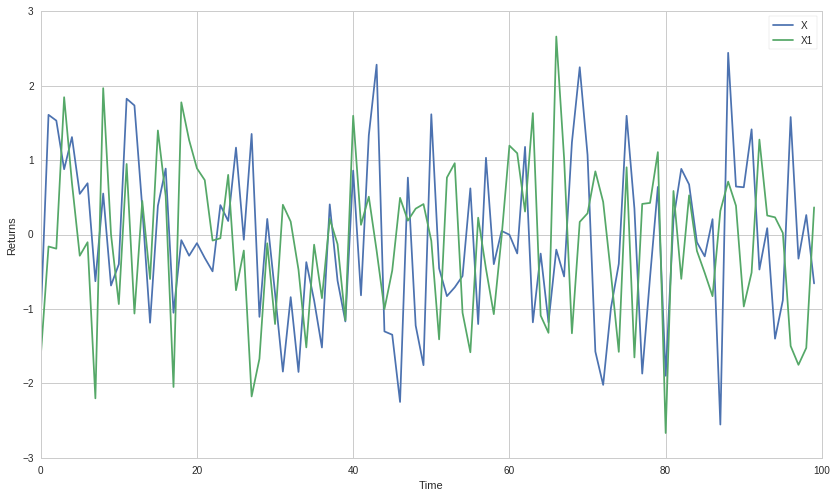

In [26]:
import numpy as np
import matplotlib.pyplot as plt
X=np.random.normal(0,1,100)
X1=np.random.normal(0,1,100)
plt.plot(X);
plt.plot(X1);
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(['X','X1'])
print "Mean X:"
print(np.mean(X))
print "Mean X1:"
print(np.mean(X1))
print "Standard Deviation X:"
print(np.std(X))
print "Standard Deviation X1:"
print(np.std(X1))

##Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

Mean X:
34.4916009335
Standard Deviation X:
7.30905560238


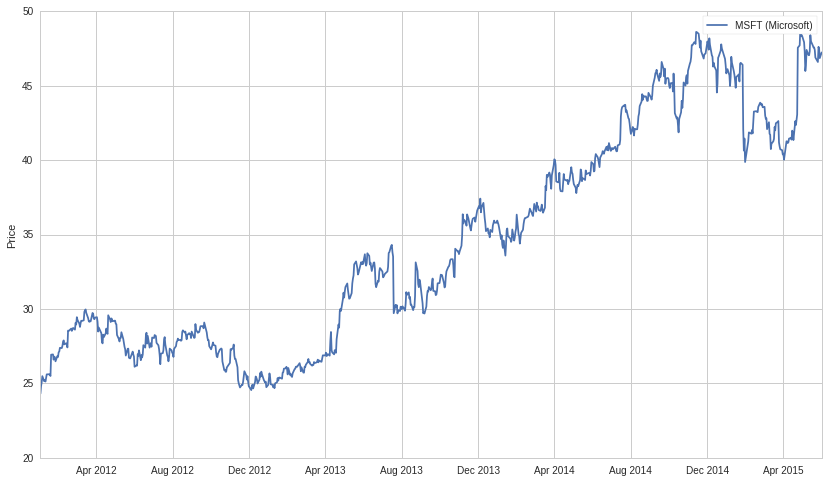

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')
X= data['price']
plt.plot(X.index, X.values);
plt.ylabel('Price')
plt.legend(['MSFT (Microsoft)'])
print "Mean X:"
print(np.mean(X))
print "Standard Deviation X:"
print(np.std(X))




Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

##Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).We can plot the returns distribution as a histogram.


Mean R:
0.000879089143364
Standard Deviation R:
0.0143478609643


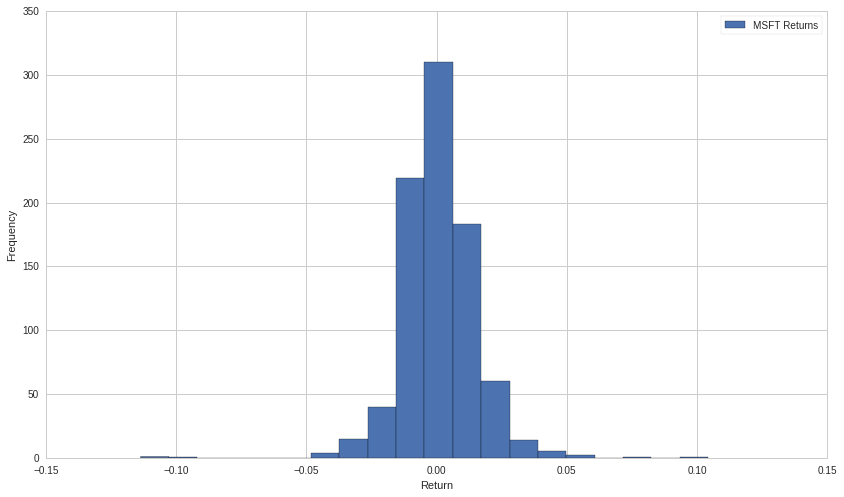

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')
X= data['price']
R = X.pct_change()[1:]
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);
print "Mean R:"
print(np.mean(R))
print "Standard Deviation R:"
print(np.std(R))





Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

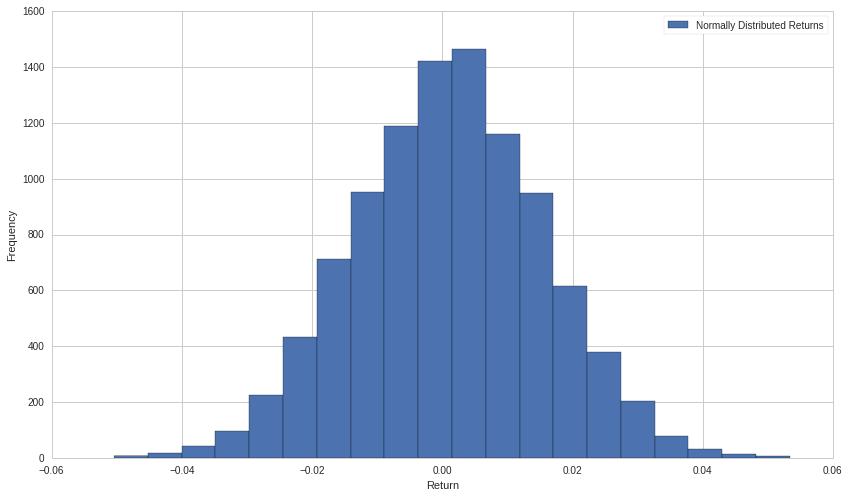

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')
X= data['price']
R = X.pct_change()[1:]
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);




##Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

Mean X:
34.4916009335
Standard Deviation X:
7.30905560238


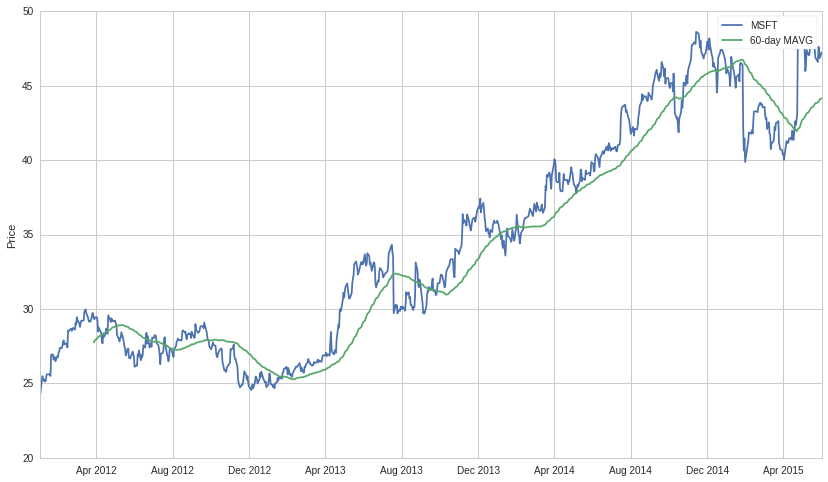

In [37]:
# Take the average of the last 60 days at each timepoint.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
MAVG = pd.rolling_mean(X, window=60)
data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')
X= data['price']
plt.plot(X.index, X.values);
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);
print "Mean X:"
print(np.mean(X))
print "Standard Deviation X:"
print(np.std(X))
